In [1]:
from sklearn.datasets import make_friedman1
X, Y = make_friedman1(n_samples=500, n_features=5)

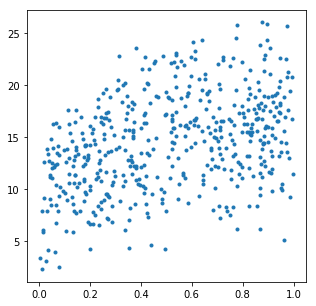

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot()
ax.plot(X[:, 0], Y, '.')
plt.show()

In [16]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X, Y)
print(model.coef_, model.intercept_)

[0. 0. 0. 0. 0.] 14.492119021595617


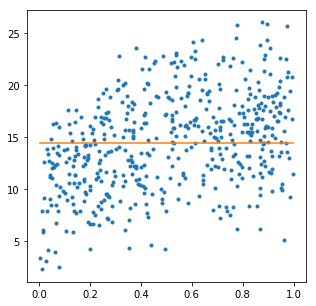

In [17]:
model = Lasso()
model.fit(X[:, :1], Y)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))
ax = plt.subplot()
x = list(sorted(X[:, :1]))
y = model.predict(x)
ax.plot(X[:, 0], Y, '.')
ax.plot(x, y)
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [1e-5, 0.01, 0.1, 0.5, 0.8, 1]}
#n_jobs = -1   => parallelise les calculs
grid = GridSearchCV(
    estimator = model, param_grid=param_grid, verbose=3, n_jobs = -1)
grid.fit(X[:, :1], Y)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] alpha=1e-05 .....................................................
[CV] alpha=1e-05 .....................................................
[CV] alpha=1e-05 .....................................................
[CV] alpha=0.01 ......................................................
[CV] ........... alpha=1e-05, score=0.17343336825266734, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ........... alpha=1e-05, score=0.13502463112708174, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] alpha=0.01 ......................................................
[CV] ........... alpha=1e-05, score=0.13572145507724354, total=   0.0s
[CV] ............ alpha=0.01, score=0.17232105846093237, total=   0.0s
[CV] ............. alpha=0.1, score=0.15772896165737882, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ............

[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [1e-05, 0.01, 0.1, 0.5, 0.8, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [25]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
